In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from pretty_confusion_matrix import pp_matrix_from_data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
insurance=pd.read_csv("Dataset/insurance_train.csv")
pd.set_option('display.max_columns',None)
insurance.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [133]:
insurance.max_torque.unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [134]:
print("shape:",insurance.shape)
insurance.isnull().sum()

shape: (58592, 44)


policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [135]:
#showing how many unique value of text column
print("Area_Cluster:",insurance.area_cluster.unique())
print("Segment:",insurance.segment.unique())
print("Model:",insurance.model.unique())
print("fuel_type:",insurance.fuel_type.unique())
print("max_torque:",insurance.max_torque.unique())
print("max_power:",insurance.max_power.unique())
print("engine_type:",insurance.engine_type.unique())
print("is_esc:",insurance.is_esc.unique())
print("is_adjustable_steering:",insurance.is_adjustable_steering.unique())
print("is_tpms:",insurance.is_tpms.unique())
print("is_parking_sensors:",insurance.is_parking_sensors.unique())
print("is_parking_camera:",insurance.is_parking_camera.unique())
print("rear_brakes_type:",insurance.rear_brakes_type.unique())
print("transmission_type:",insurance.transmission_type.unique())
print("steering_type:",insurance.steering_type.unique())
print("is_front_fog_lights:",insurance.is_front_fog_lights.unique())
print("is_rear_window_wiper:",insurance.is_rear_window_wiper.unique())
print("is_rear_window_washer:",insurance.is_rear_window_washer.unique())
print("is_rear_window_defogger:",insurance.is_rear_window_defogger.unique())
print("is_brake_assist:",insurance.is_brake_assist.unique())
print("is_power_door_locks:",insurance.is_power_door_locks.unique())
print("is_central_locking:",insurance.is_central_locking.unique())
print("is_power_steering:",insurance.is_power_steering.unique())
print("is_driver_seat_height_adjustable:",insurance.is_driver_seat_height_adjustable.unique())
print("is_day_night_rear_view_mirror:",insurance.is_day_night_rear_view_mirror.unique())
print("is_ecw:",insurance.is_ecw.unique())
print("is_speed_alert:",insurance.is_speed_alert.unique())

Area_Cluster: ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
Segment: ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
Model: ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type: ['CNG' 'Petrol' 'Diesel']
max_torque: ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
max_power: ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
engine_type: ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
is_esc: ['No' 'Yes']
is_adjustable_steering: ['No' 'Yes']
is_tpms: ['No' 'Yes']
is_parking_sensors: ['Yes' 'No']
is_parking_camera: ['No' 'Yes']
rear_brakes_ty

In [136]:
encoder=LabelEncoder()

insurance['le_area_cluster']=encoder.fit_transform(insurance['area_cluster'])
insurance['le_segment']=encoder.fit_transform(insurance['segment'])
insurance['le_model']=encoder.fit_transform(insurance['model'])
insurance['le_fuel_type']=encoder.fit_transform(insurance['fuel_type'])
insurance['le_max_torque']=encoder.fit_transform(insurance['max_torque'])
insurance['le_max_power']=encoder.fit_transform(insurance['max_power'])
insurance['le_engine_type']=encoder.fit_transform(insurance['engine_type'])
insurance['le_is_esc']=encoder.fit_transform(insurance['is_esc'])
insurance['le_is_adjustable_steering']=encoder.fit_transform(insurance['is_adjustable_steering'])
insurance['le_is_tpms']=encoder.fit_transform(insurance['is_tpms'])
insurance['le_is_parking_sensors']=encoder.fit_transform(insurance['is_parking_sensors'])
insurance['le_is_parking_camera']=encoder.fit_transform(insurance['is_parking_camera'])
insurance['le_rear_brakes_type']=encoder.fit_transform(insurance['rear_brakes_type'])
insurance['le_transmission_type']=encoder.fit_transform(insurance['transmission_type'])
insurance['le_steering_type']=encoder.fit_transform(insurance['steering_type'])
insurance['le_is_front_fog_lights']=encoder.fit_transform(insurance['is_front_fog_lights'])
insurance['le_is_rear_window_wiper']=encoder.fit_transform(insurance['is_rear_window_wiper'])
insurance['le_is_rear_window_washer']=encoder.fit_transform(insurance['is_rear_window_washer'])
insurance['le_is_rear_window_defogger']=encoder.fit_transform(insurance['is_rear_window_defogger'])
insurance['le_is_brake_assist']=encoder.fit_transform(insurance['is_brake_assist'])
insurance['le_is_power_door_locks']=encoder.fit_transform(insurance['is_power_door_locks'])
insurance['le_is_central_locking']=encoder.fit_transform(insurance['is_central_locking'])
insurance['le_is_power_steering']=encoder.fit_transform(insurance['is_power_steering'])
insurance['le_is_driver_seat_height_adjustable']=encoder.fit_transform(insurance['is_driver_seat_height_adjustable'])
insurance['le_is_day_night_rear_view_mirror']=encoder.fit_transform(insurance['is_day_night_rear_view_mirror'])
insurance['le_is_ecw']=encoder.fit_transform(insurance['is_ecw'])
insurance['le_is_speed_alert']=encoder.fit_transform(insurance['is_speed_alert'])
insurance.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,le_area_cluster,le_segment,le_model,le_fuel_type,le_max_torque,le_max_power,le_engine_type,le_is_esc,le_is_adjustable_steering,le_is_tpms,le_is_parking_sensors,le_is_parking_camera,le_rear_brakes_type,le_transmission_type,le_steering_type,le_is_front_fog_lights,le_is_rear_window_wiper,le_is_rear_window_washer,le_is_rear_window_defogger,le_is_brake_assist,le_is_power_door_locks,le_is_central_locking,le_is_power_steering,le_is_driver_seat_height_adjustable,le_is_day_night_rear_view_mirror,le_is_ecw,le_is_speed_alert
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,11,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,15,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1


In [137]:
le_insurance=insurance.drop(['policy_id','area_cluster','segment','model','fuel_type','max_torque','max_power','engine_type','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert'],axis=1)
le_insurance.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,le_area_cluster,le_segment,le_model,le_fuel_type,le_max_torque,le_max_power,le_engine_type,le_is_esc,le_is_adjustable_steering,le_is_tpms,le_is_parking_sensors,le_is_parking_camera,le_rear_brakes_type,le_transmission_type,le_steering_type,le_is_front_fog_lights,le_is_rear_window_wiper,le_is_rear_window_washer,le_is_rear_window_defogger,le_is_brake_assist,le_is_power_door_locks,le_is_central_locking,le_is_power_steering,le_is_driver_seat_height_adjustable,le_is_day_night_rear_view_mirror,le_is_ecw,le_is_speed_alert
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,11,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,15,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0,16,3,3,2,0,6,2,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0,17,0,4,2,8,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1


In [138]:
x=le_insurance.drop('is_claim',axis=1)
y=le_insurance.is_claim

In [139]:
len(y)

58592

In [140]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

f:\Code\ML_Exercise\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='is_claim', ylabel='count'>

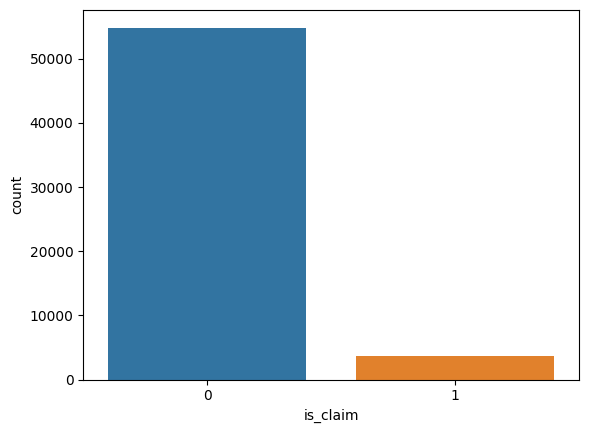

In [141]:
sns.countplot(le_insurance["is_claim"])

#Random Forest

In [142]:
random_forest_model=RandomForestClassifier(n_estimators=30)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [143]:
print("Train Size",X_train.shape)
print("Test Size",X_test.shape)

Train Size (41014, 42)
Test Size (17578, 42)


In [144]:
acc_random_forest=random_forest_model.score(X_test,y_test)
acc_random_forest

0.9288883832062805

In [145]:
row=x.iloc[19].values
print("Actual Outcome:",y[19])
random_forest_model.predict([row])

Actual Outcome: 1


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [146]:
y_predicted=random_forest_model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[16320,    74],
       [ 1176,     8]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

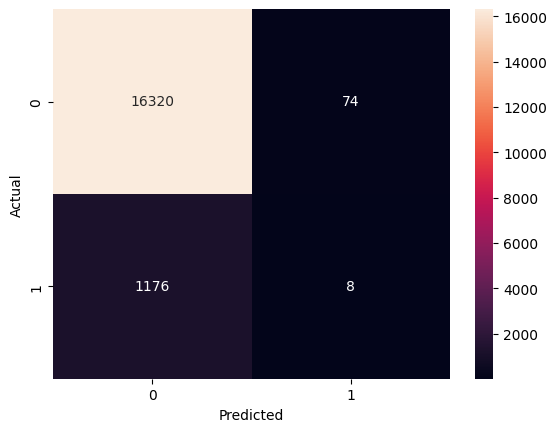

In [147]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [148]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16394
           1       0.10      0.01      0.01      1184

    accuracy                           0.93     17578
   macro avg       0.52      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578



#Decision Tree

In [149]:
decision_tree_model=tree.DecisionTreeClassifier()
decision_tree_model.fit(x,y)

DecisionTreeClassifier()

In [150]:
acc_decision_tree= decision_tree_model.score(x,y)
acc_decision_tree

1.0

In [151]:
print("Actual Outcome:",y[21])
row=x.iloc[21].values
print("Value of entire row:",row,"\n")
print("Prediction: ",decision_tree_model.predict([row]))

Actual Outcome: 1
Value of entire row: [5.27085217e-01 0.00000000e+00 6.15384615e-01 2.16220000e+04
 1.00000000e+00 2.00000000e+00 7.96000000e+02 3.00000000e+00
 5.00000000e+00 4.60000000e+00 3.44500000e+03 1.51500000e+03
 1.47500000e+03 1.18500000e+03 0.00000000e+00 1.60000000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e+00
 2.00000000e+00 6.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00] 

Prediction:  [1]


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [152]:
y_predicted=decision_tree_model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[16394,     0],
       [    0,  1184]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

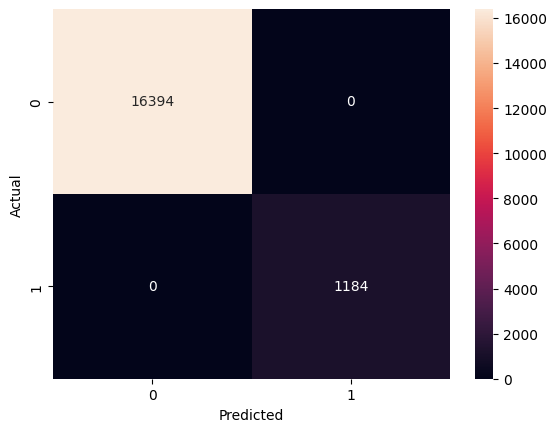

In [153]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

#Support Vector Machine(SVM)

In [154]:
svm_model=SVC(kernel='sigmoid')
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
svm_model.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [155]:
acc_svm=svm_model.score(X_test,y_test)
acc_svm

0.9134713846854022

In [156]:
y_test.value_counts()

0    16450
1     1128
Name: is_claim, dtype: int64

In [157]:
row=x.iloc[4].values
print("Actual Outcome:",y[4])
svm_model.predict([row])

Actual Outcome: 0


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [158]:
y_predicted=svm_model.predict(X_test)
print(y_predicted)
y_test[:5]

[0 0 0 ... 0 0 0]


48541    0
21694    0
34965    0
46291    0
37610    0
Name: is_claim, dtype: int64

f:\Code\ML_Exercise\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: ylabel='count'>

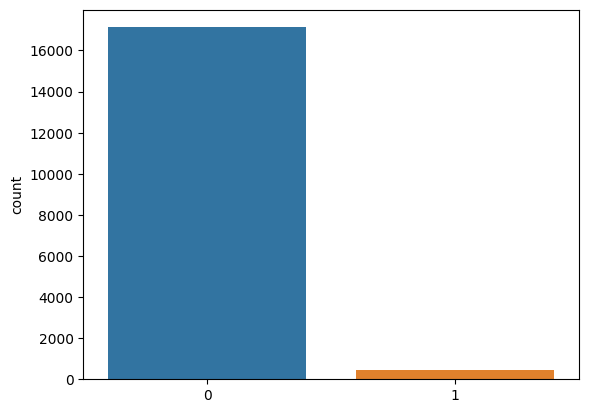

In [159]:
sns.countplot(y_predicted)

In [160]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[16029,   421],
       [ 1100,    28]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth value')

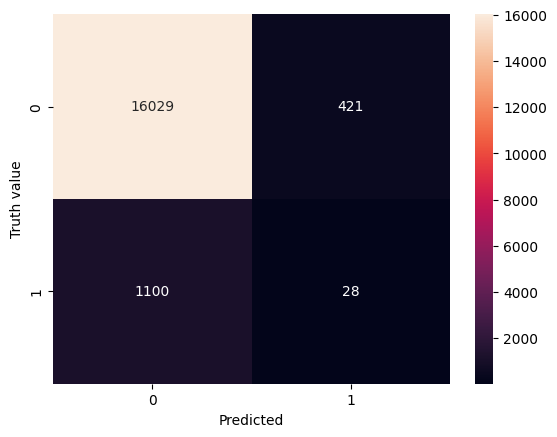

In [161]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth value")

#Logistic Regression

In [162]:
logistic_model=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [163]:
acc_logistic_R=logistic_model.score(X_test,y_test)
acc_logistic_R

0.9350627186620019

In [164]:
y_test.value_counts()

0    10958
1      761
Name: is_claim, dtype: int64

In [165]:
row=x.iloc[23].values
print("Actual Outcome:",y[23])
svm_model.predict([row])

Actual Outcome: 1


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth value')

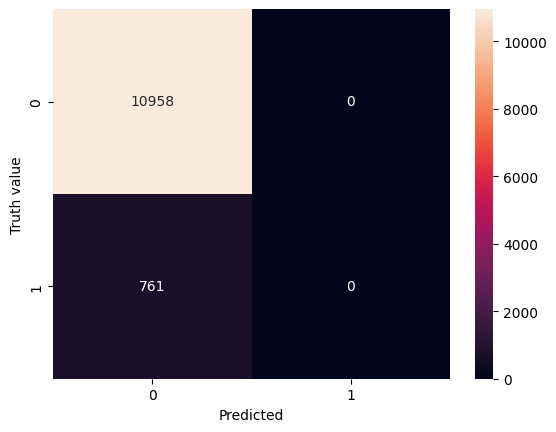

In [166]:
y_predicted=logistic_model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth value")

#Accuracy Analysis

<BarContainer object of 4 artists>

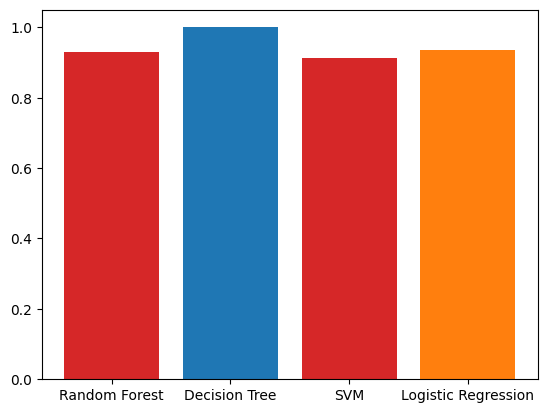

In [167]:
algorithm=["Random Forest","Decision Tree","SVM","Logistic Regression"]
accuracy=[acc_random_forest,acc_decision_tree,acc_svm,acc_logistic_R]
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.bar(algorithm,accuracy,color=bar_colors)